# WEEK 14 (8/01/18)

### Objectives
* Decide how to determine the clustering levels (log, linear,etc.)
* Produce ODMs at different scales $\checkmark$
* Make heatmaps of epsilon at different scales $\checkmark$

### Questions
* Find how epsilon varies with the rescaling $\rightarrow$ can we find a critical point?
* In particular, how does epsilon vary with the cophonetic distance?

### To Do / Ideas
* Perhaps it would make more sense to substract the original (= clustering level -1) (reduced = combined) ODM to the clustered ODM at each level to find $\epsilon$ as opposed to subtracting the ODM of the previous clustering level each time
* 

### Clustering Routine
To make it easier to perform clustering on the area of interest, we now have a module (eps_scale.py) which streamlines all the steps to **iteratively cluster the locations and produce the relative ODMs**.

We can then use its functions to output the matrices and plot them using heatmaps, together with the epsilon matrix $ E$, at the desired level of clustering.

This way we can apply our analysis to different areas in the UK and see if we observe the same **scaling behaviour**.

We'll start from London, for now just with the gravity model (the same analysis can then be applied on the radiation model with minimal changes). One idea for studying the behaviour of epsilon could be finding the **cophonetic distance that minimises the mean value of $\epsilon$**.
It would then be interesting to see if there is some sort of **critical point** after which we observe self-similarity, in analogy with the **renormalisation group** in stat mech.

In [23]:
%load_ext autoreload
%autoreload 2
from hm.analysis.scaling import eps_scale
from hm.coarse_grain import clustering
from hm.coarse_grain.coarse_matrix import epsilon_matrix
from matplotlib import pyplot as plt
import pandas
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### London

In [24]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Let's compare the ODMs for the combined flow between the locations (first fig.) with the flow between the clustered locations (second fig.):

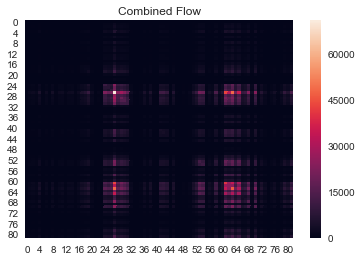

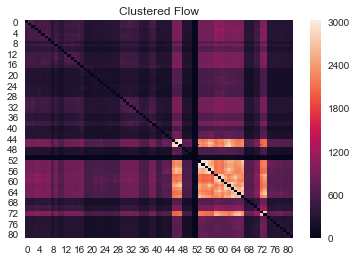

In [10]:
sns.heatmap(eps_scale.reduced_ODM(eps_scale.lon_df, 5000, 0))
plt.title("Combined Flow")
plt.show()
sns.heatmap(eps_scale.reordered_ODM(eps_scale.lon_df, 5000, 1))
plt.title("Clustered Flow")
plt.show()

Substracting these two ODMs (and dividing by the clustered flow) gives the epsilon matrix:

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


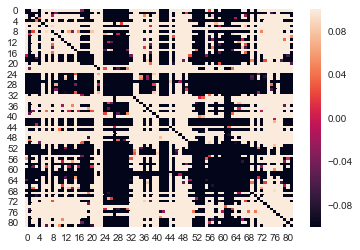

In [17]:
sns.heatmap(eps_scale.epsilon(eps_scale.lon_df, 5000, 0))
plt.show()

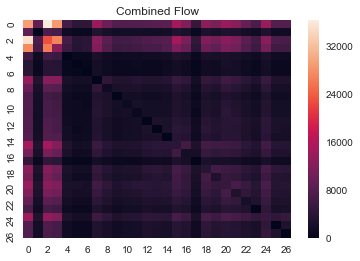

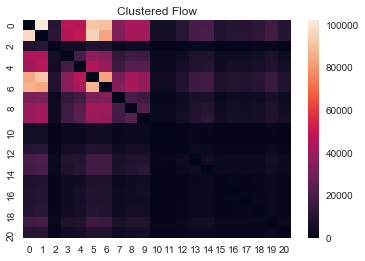

In [10]:
sns.heatmap(eps_scale.reduced_ODM(lon_df, 5000, 2))
plt.title("Combined Flow")
plt.show()
sns.heatmap(eps_scale.gravity_ODM(lon_df, 5000, 3))
plt.title("Clustered Flow")
plt.show()

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


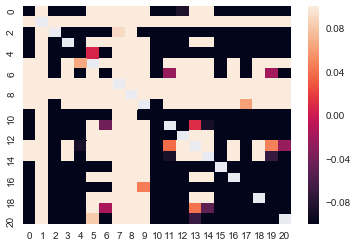

In [9]:
sns.heatmap(eps_scale.epsilon(lon_df, 5000, 3))
plt.show()

In [15]:
matrix_df = pandas.DataFrame(eps_scale.gravity_ODM(lon_df, 5000, 2))

In [16]:
matrix_df.()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.000000,34371.951321,32139.124443,6606.768561,25889.453029,24141.644670,25080.435687,22687.045112,21804.309243,5520.436171,...,6005.429825,5749.084244,5802.756918,6537.401534,6676.649134,6380.919687,10825.283735,10400.474731,8492.758009,8390.275515
1,33114.357415,0.000000,30049.269896,6884.904066,25553.134852,24754.660218,25898.774438,24486.262638,22774.158622,5877.231807,...,5850.871548,5611.807378,5622.850696,6599.097064,6725.388270,6378.931145,10753.333473,10272.630481,8342.350486,8268.226655
2,31574.116232,30642.129432,0.000000,6915.724345,28893.478085,23980.042925,25378.327237,22092.543448,20627.096361,5054.621692,...,6335.368826,5956.228437,6055.206168,6474.381985,6766.046725,6405.371532,10973.740735,10488.391581,8719.666898,8544.925493
3,5708.804929,6175.069632,6082.703145,0.000000,5855.001499,5244.198055,5884.692560,4997.807167,4332.267100,1039.215912,...,1249.532762,1185.002913,1180.619034,1368.010949,1454.004428,1340.599425,2274.863509,2142.040023,1763.393815,1739.985273
4,24648.239085,25251.958433,28000.493411,6451.102220,0.000000,22045.343781,23862.186213,19674.560647,18064.976345,4327.277133,...,6109.773567,5613.902507,5658.150653,5916.937011,6387.418668,5935.717110,10269.290638,9689.329519,8206.765595,7982.455123
5,22918.276597,24392.703047,23172.233553,5761.533327,21982.088702,0.000000,27467.465340,21673.627426,20315.411243,4550.427664,...,5313.044367,5199.570878,5083.288422,7497.931860,7364.752974,6753.274408,10866.706584,10120.229393,7943.787929,8022.142975
6,23209.544038,24877.034092,23905.474196,6302.301860,23194.164858,26775.341220,0.000000,22272.901678,19403.588653,4477.628295,...,5395.238505,5207.273543,5111.562166,6539.745308,7116.692519,6317.059884,10521.836538,9764.620472,7884.988495,7869.288094
7,20891.939391,23405.136705,20708.535089,5326.282636,19030.177658,21024.095615,22163.895329,0.000000,18466.103710,4289.988834,...,4405.303899,4252.882088,4213.498930,5342.770674,5418.305521,5059.911117,8416.532708,7958.390211,6392.386448,6376.197891
8,21225.917562,23011.998529,20439.255642,4880.712825,18471.344778,20832.176927,20411.488071,19520.843875,0.000000,4906.013487,...,4418.519285,4305.256099,4265.953706,5574.293301,5392.398342,5186.732256,8563.676759,8193.790004,6485.388899,6502.018456
9,5037.906585,5567.207311,4695.352608,1097.555261,4147.901211,4374.353027,4415.635577,4251.400866,4599.189615,0.000000,...,982.032347,952.166820,948.593203,1174.704560,1162.623211,1115.181082,1860.028673,1783.353535,1425.704943,1422.673814
